Datatrained
Evaluation Project - 3
Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip


#### Initially focussing on prediciting the average price

In [143]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNetCV


from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import zscore
from scipy import stats

In [157]:
from sklearn.metrics import confusion_matrix,classification_report,plot_roc_curve


In [2]:
df = pd.read_csv("avocado.csv",index_col='Unnamed: 0')

In [3]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [4]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [5]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

the target column (Average Price) is numerical column and it is a regression problem

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


All features are numerical and it is a regression problem.

No missing data in any feature

In [7]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [8]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

dropping the date column as now we have the day, month and year columns

In [11]:
df.drop('Date',axis=1,inplace=True)

In [12]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


## checking for outliers

In [13]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [14]:
zScores=np.abs(zscore(df.drop(['type','region'],axis=1)))
zScores

array([[0.18868864, 0.22771641, 0.23081597, ..., 1.22128204, 1.64763162,
        1.29185687],
       [0.13901962, 0.23042664, 0.23110251, ..., 1.22128204, 1.64763162,
        0.49423066],
       [1.18206895, 0.21208462, 0.23100731, ..., 1.22128204, 1.64763162,
        0.30339555],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 1.97050371, 1.46495942,
        0.60817726],
       [1.30138182, 0.24162464, 0.2304279 , ..., 1.97050371, 1.46495942,
        0.18944895],
       [0.53151208, 0.24125273, 0.22934712, ..., 1.97050371, 1.46495942,
        0.98707516]])

In [15]:
filteredEntries=(zScores<3).all(axis=1)
filteredEntries

array([ True,  True,  True, ...,  True,  True,  True])

In [16]:
np.sum(filteredEntries)

17651

In [17]:
((18249-17651)/18249)*100

3.276891884486821

only 3.27% data is outliers so removing them

In [18]:
df=df[filteredEntries]


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17651 entries, 0 to 11
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  17651 non-null  float64
 1   Total Volume  17651 non-null  float64
 2   4046          17651 non-null  float64
 3   4225          17651 non-null  float64
 4   4770          17651 non-null  float64
 5   Total Bags    17651 non-null  float64
 6   Small Bags    17651 non-null  float64
 7   Large Bags    17651 non-null  float64
 8   XLarge Bags   17651 non-null  float64
 9   type          17651 non-null  object 
 10  year          17651 non-null  int64  
 11  region        17651 non-null  object 
 12  Month         17651 non-null  int64  
 13  Day           17651 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 2.0+ MB


## EDA

In [20]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

<AxesSubplot:xlabel='Total Volume', ylabel='Density'>

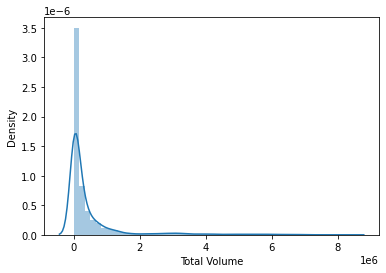

In [21]:
sns.distplot(df['Total Volume'])

Total Volume is more in the range 0 to 1.5, shown in 10^6 

<AxesSubplot:xlabel='4046', ylabel='Density'>

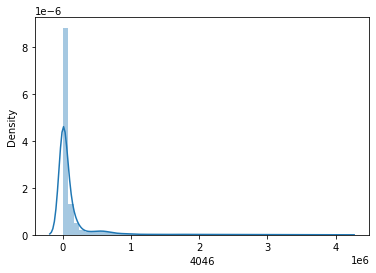

In [22]:
sns.distplot(df['4046'])

'4046' is more in the range 0 to 0.5 shown on 10^6

In [23]:
df.type.value_counts()


organic         8992
conventional    8659
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

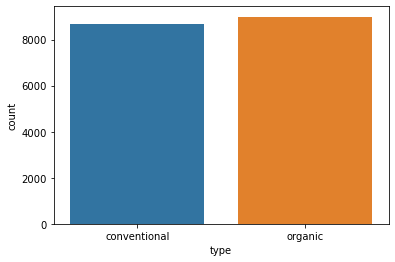

In [24]:
sns.countplot(data=df,x='type')

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

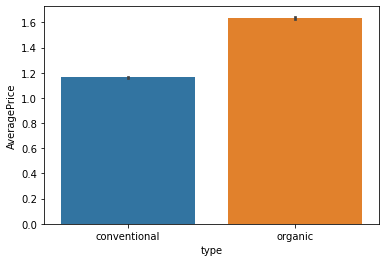

In [25]:
sns.barplot(data=df,x='type',y='AveragePrice')

In [26]:
df.groupby('year')['Total Volume'].mean()

year
2015    473276.133897
2016    454077.346687
2017    453901.670525
2018    471197.114956
Name: Total Volume, dtype: float64

In [27]:
organic = df[df['type'] == 'organic']
organic

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.83,989.55,8.16,88.59,0.00,892.80,892.80,0.00,0.0,organic,2015,Albany,12,27
1,1.89,1163.03,30.24,172.14,0.00,960.65,960.65,0.00,0.0,organic,2015,Albany,12,20
2,1.85,995.96,10.44,178.70,0.00,806.82,806.82,0.00,0.0,organic,2015,Albany,12,13
3,1.84,1158.42,90.29,104.18,0.00,963.95,948.52,15.43,0.0,organic,2015,Albany,12,6
4,1.94,831.69,0.00,94.73,0.00,736.96,736.96,0.00,0.0,organic,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [28]:
organic.groupby('year')['AveragePrice'].mean()

year
2015    1.668744
2016    1.559201
2017    1.700979
2018    1.567176
Name: AveragePrice, dtype: float64

In [29]:
df.groupby('year')['type'].value_counts()


year  type        
2015  organic         2795
      conventional    2720
2016  organic         2780
      conventional    2650
2017  organic         2769
      conventional    2698
2018  organic          648
      conventional     591
Name: type, dtype: int64

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

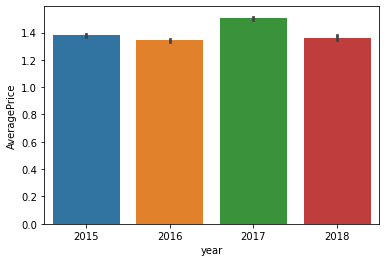

In [30]:
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )


as the default estimator is mean, It shows that highest mean avergae Price is for 2017 and least avergae price is in 2016

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

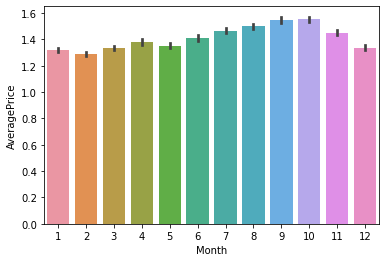

In [31]:
sns.barplot(x = "Month" , y = "AveragePrice" ,data=df )


The mean of the average price is  increasing starting from JANUARY and highest is in 10th month and after that is decreased again

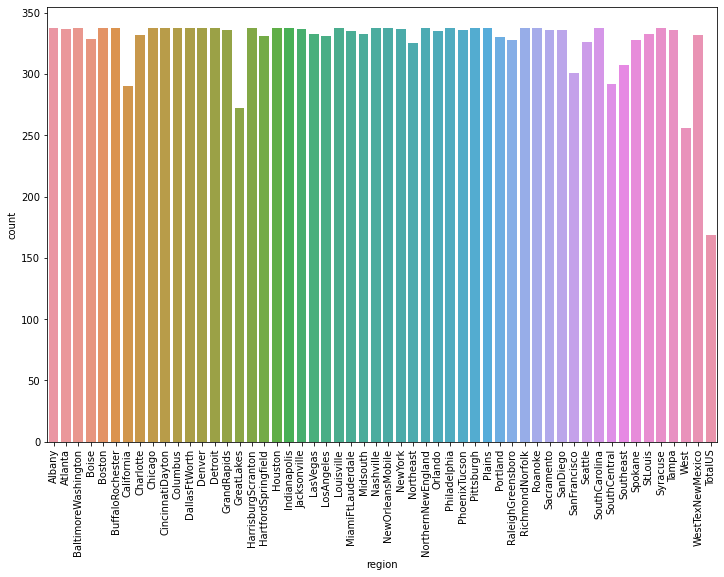

In [32]:

plt.figure(figsize=(12,8))
sns.countplot(data=df,x='region')
plt.xticks(rotation=90);


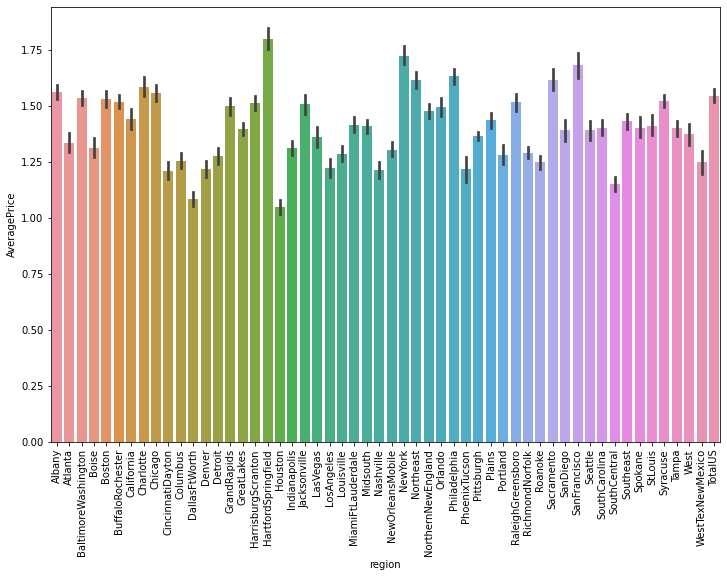

In [33]:
plt.figure(figsize=(12,8))
sns.barplot(x = "region" , y = "AveragePrice" ,data=df )
plt.xticks(rotation=90);


Average price is higher for HarrisburgScranton

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

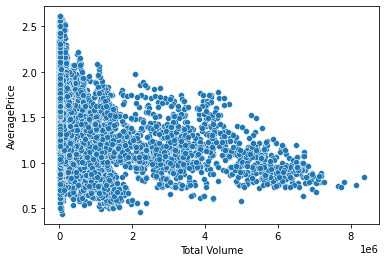

In [34]:
sns.scatterplot(data=df,x='Total Volume',y='AveragePrice')

<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

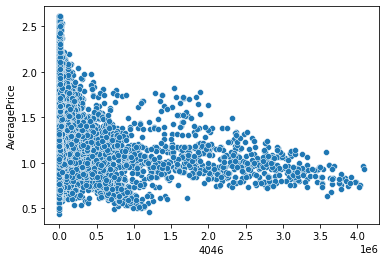

In [35]:
sns.scatterplot(data=df,x='4046',y='AveragePrice')

<AxesSubplot:xlabel='Large Bags', ylabel='AveragePrice'>

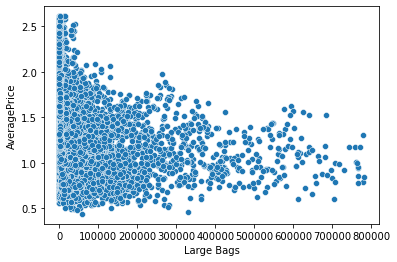

In [36]:
sns.scatterplot(data=df,x='Large Bags',y='AveragePrice')

## removing skewness


In [37]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'Day'],
      dtype='object')

In [38]:
for column in df.drop(['type','region'],axis=1).columns[1:]:
    print(column , df[column].skew())

Total Volume 3.767137602983901
4046 4.909847799473674
4225 4.455745349647941
4770 5.117169679810346
Total Bags 4.06677130442822
Small Bags 4.222705587481023
Large Bags 5.0534342348618075
XLarge Bags 6.135607410296316
year 0.22997611486338987
Month 0.10740755701540106
Day 0.011777824653029196


Most of the columns have more skew than year,Month, Day

In [39]:
moreSkew=df.drop(['AveragePrice','type','region','year','Month','Day'],axis=1).columns

In [40]:
moreSkew

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags'],
      dtype='object')

In [41]:
for column in moreSkew:
    print(column , df[column].skew())

Total Volume 3.767137602983901
4046 4.909847799473674
4225 4.455745349647941
4770 5.117169679810346
Total Bags 4.06677130442822
Small Bags 4.222705587481023
Large Bags 5.0534342348618075
XLarge Bags 6.135607410296316


In [42]:
def min_skewness(colu):
    min_Skew=np.abs(df[colu].skew())
    print("initial",min_Skew)
    
    box_col_Skew=10
    min_SkewType=""
    log_col=np.log(df[colu])
    sqrt_col=np.sqrt(df[colu])
    try:
        box_col=stats.boxcox(df[colu])[0]
        box_col_Skew=np.abs(pd.Series(box_col).skew())
        print(box_col_Skew)

    except ValueError:
        print("hi")
    
    log_col_Skew=np.abs(log_col.skew())
    sqrt_col_Skew=np.abs(sqrt_col.skew())
    
    print(log_col_Skew)
    print(sqrt_col_Skew)
    
    if log_col_Skew<min_Skew:
        min_SkewType="log"
        min_Skew=log_col_Skew
    if sqrt_col_Skew<min_Skew:
        min_SkewType="sqrt"
        min_Skew=sqrt_col_Skew
    if box_col_Skew<min_Skew:
        min_SkewType="box"
        min_Skew=box_col_Skew
    print(min_Skew)
    print(column,"=",min_SkewType)
        

In [43]:
for column in moreSkew:
    print(column)
    min_skewness(column)
    print("="*20)

Total Volume
initial 3.767137602983901
0.00866454454874856
0.05009236689694154
1.963864239750663
0.00866454454874856
Total Volume = box
4046
initial 4.909847799473674
hi
nan
2.4975043264848007
2.4975043264848007
4046 = sqrt
4225
initial 4.455745349647941
hi
nan
2.1285045840666115
2.1285045840666115
4225 = sqrt
4770
initial 5.117169679810346
hi
nan
2.636657566074788
2.636657566074788
4770 = sqrt
Total Bags
initial 4.06677130442822
hi
nan
2.010691337585347
2.010691337585347
Total Bags = sqrt
Small Bags
initial 4.222705587481023
hi
nan
2.0937524665389438
2.0937524665389438
Small Bags = sqrt
Large Bags
initial 5.0534342348618075
hi
nan
2.2367564369618895
2.2367564369618895
Large Bags = sqrt
XLarge Bags
initial 6.135607410296316
hi
nan
3.3124842464294337
3.3124842464294337
XLarge Bags = sqrt


For 'Total Volume' apply boxcox transformation
For '4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags' apply sqrt transformation

In [44]:
sqrtTransformation=['4046', '4225', '4770', 'Total Bags', 'Small Bags','Large Bags', 'XLarge Bags']


In [45]:
df['Total Volume']= stats.boxcox(df['Total Volume'])[0]

In [46]:
for column in sqrtTransformation:
    df[column] =np.sqrt(df[column])

In [47]:
for column in moreSkew:
    print(column , df[column].skew())

Total Volume -0.00866454454874856
4046 2.4975043264848007
4225 2.1285045840666115
4770 2.636657566074788
Total Bags 2.010691337585347
Small Bags 2.0937524665389438
Large Bags 2.2367564369618895
XLarge Bags 3.3124842464294337


For all features skewness is reduced now

In [48]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.861915,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,conventional,2015,Albany,12,27
1,1.35,11.681565,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,conventional,2015,Albany,12,20
2,0.93,12.563792,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,conventional,2015,Albany,12,13
3,1.08,12.099252,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,conventional,2015,Albany,12,6
4,1.28,11.598663,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,conventional,2015,Albany,11,29


In [49]:
df1ForRegion=df

In [175]:
df=df1ForRegion

In [177]:
df.drop(['type','region'],axis=1).corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.580123,-0.486646,-0.383075,-0.387621,-0.447396,-0.409643,-0.404012,-0.246919,0.091704,0.149502,0.026819
Total Volume,-0.580123,1.000000,0.747315,0.811612,0.645068,0.837175,0.818824,0.648405,0.496251,0.080710,-0.021861,-0.006430
4046,-0.486646,0.747315,1.000000,0.700307,0.646770,0.813427,0.797807,0.660573,0.534654,-0.015959,-0.017846,-0.007602
4225,-0.383075,0.811612,0.700307,1.000000,0.736356,0.850131,0.858570,0.598958,0.519927,-0.028971,-0.021458,-0.009275
4770,-0.387621,0.645068,0.646770,0.736356,1.000000,0.671898,0.684217,0.442492,0.591153,-0.095625,-0.029821,-0.001262
Total Bags,-0.447396,0.837175,0.813427,0.850131,0.671898,1.000000,0.977625,0.796421,0.616514,0.147646,-0.012456,0.000806
Small Bags,-0.409643,0.818824,0.797807,0.858570,0.684217,0.977625,1.000000,0.662069,0.622866,0.128055,-0.010555,0.003755
Large Bags,-0.404012,0.648405,0.660573,0.598958,0.442492,0.796421,0.662069,1.000000,0.395390,0.159790,-0.011329,-0.004999
XLarge Bags,-0.246919,0.496251,0.534654,0.519927,0.591153,0.616514,0.622866,0.395390,1.000000,0.140672,0.004947,0.011685
year,0.091704,0.080710,-0.015959,-0.028971,-0.095625,0.147646,0.128055,0.159790,0.140672,1.000000,-0.175287,0.004700


<AxesSubplot:>

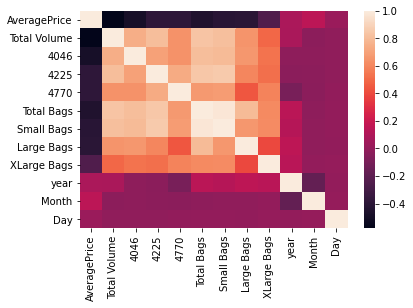

In [178]:
sns.heatmap(df.drop(['type','region'],axis=1).corr())

### encoding the categorical columns

In [179]:
catCols=['type','region']

In [180]:
le = LabelEncoder()


In [181]:
for i in catCols:
    df[i] = le.fit_transform(df[i])


In [182]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.861915,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,0,2015,0,12,27
1,1.35,11.681565,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,0,2015,0,12,20
2,0.93,12.563792,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,0,2015,0,12,13
3,1.08,12.099252,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,0,2015,0,12,6
4,1.28,11.598663,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,10.355397,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,1,2018,53,2,4
8,1.71,10.122725,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,1,2018,53,1,28
9,1.87,10.112859,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,1,2018,53,1,21
10,1.93,10.296466,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,1,2018,53,1,14


In [183]:
df = pd.get_dummies(df, columns=catCols,drop_first=True)

In [184]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_44,region_45,region_46,region_47,region_48,region_49,region_50,region_51,region_52,region_53
0,1.33,11.861915,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,11.681565,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,12.563792,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,12.099252,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,11.598663,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,10.355397,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
8,1.71,10.122725,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
9,1.87,10.112859,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
10,1.93,10.296466,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,2018,...,0,0,0,0,0,0,0,0,0,1


In [186]:
X=df.drop('AveragePrice',axis=1)
y=df['AveragePrice']

In [220]:
X.columns

Index(['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day', 'type_1',
       'region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6',
       'region_7', 'region_8', 'region_9', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16',
       'region_17', 'region_18', 'region_19', 'region_20', 'region_21',
       'region_22', 'region_23', 'region_24', 'region_25', 'region_26',
       'region_27', 'region_28', 'region_29', 'region_30', 'region_31',
       'region_32', 'region_33', 'region_34', 'region_35', 'region_36',
       'region_37', 'region_38', 'region_39', 'region_40', 'region_41',
       'region_42', 'region_43', 'region_44', 'region_45', 'region_46',
       'region_47', 'region_48', 'region_49', 'region_50', 'region_51',
       'region_52', 'region_53'],
      dtype='object')

In [187]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,...,region_44,region_45,region_46,region_47,region_48,region_49,region_50,region_51,region_52,region_53
0,11.861915,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
1,11.681565,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
2,12.563792,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
3,12.099252,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
4,11.598663,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,2015,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,10.355397,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,2018,2,...,0,0,0,0,0,0,0,0,0,1
8,10.122725,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1
9,10.112859,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1
10,10.296466,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1


In [188]:
explained_variance = []

for n in range(1,65):
    pca = PCA(n_components=n)
    pca.fit(X)
    
    explained_variance.append((np.sum(pca.explained_variance_ratio_)*100))

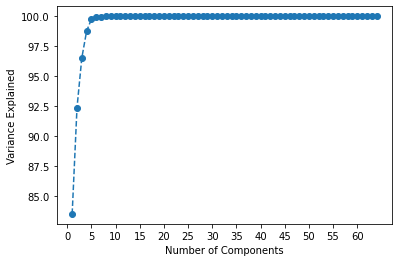

In [190]:
plt.plot(range(1,65),explained_variance,'o--')
plt.xticks(list(range(0,65,5)))
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

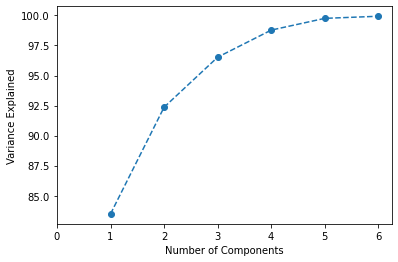

In [194]:
plt.plot(range(1,7),explained_variance[0:6],'o--')
plt.xticks(list(range(0,7,1)))
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [201]:
explained_variance[2]

96.52459395651812

even 3 components can explain 96.5% of variance so using only 3 components

In [202]:
pca = PCA(n_components=3)
x_pca=pca.fit_transform(X)

## identifying the best random state

In [204]:
minRMSE="null"
minRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    RMSE=np.sqrt(mean_squared_error(y_test,pred))
    if(minRMSE=="null" or RMSE<minRMSE):
        minRMSE=RMSE
        minRS=i
        
print("min RMSE is",minRMSE,"on random state",minRS)

min RMSE is 0.3277200139977321 on random state 14


min RMSE is 0.3277200139977321 on random state 14


In [205]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=14)


## Scaling

In [206]:
from sklearn.preprocessing import StandardScaler

In [207]:
scaler = StandardScaler()

In [209]:
x_pca

array([[-270.89580111,  105.54746982,   75.83311405],
       [-282.01557793,   97.38314354,   59.14825462],
       [-224.06058042,  168.78953032,  125.28933537],
       ...,
       [-360.99132388,   -8.94482187,  -11.82343334],
       [-348.94863488,   -7.68957281,  -14.78334333],
       [-341.77878464,  -22.14658835,  -18.13350905]])

In [210]:
x_train_scale=scaler.fit_transform(X_train)


In [213]:
x_test_scale=scaler.transform(X_test)
x_test_scale

array([[-0.62181313,  0.3052166 ,  0.30966177],
       [ 1.08221672,  0.13455497, -2.15926   ],
       [ 0.39450957,  0.34877763, -0.03939458],
       ...,
       [-0.76472016,  0.08074325,  0.41772663],
       [ 0.20526851,  1.31175886, -0.06343635],
       [ 1.11993016,  3.40273493,  0.53021883]])

In [214]:
lr=LinearRegression()
lr.fit(x_train_scale,y_train)
pred=lr.predict(x_test_scale)

lrR2=r2_score(y_test, pred)
lrR2

0.26259031460963966

In [215]:
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

0.3277200139977321

scaling is not needed as with and without sclaing RMSE is same

In [216]:
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

lrR2=r2_score(y_test, pred)
lrR2

0.26259031460963966

In [217]:
lrRMSE=np.sqrt(mean_squared_error(y_test,pred))
lrRMSE

0.3277200139977321

In [218]:
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)
svrR2=r2_score(y_test, pred)
svrR2

0.47517203912017447

In [219]:
svrRMSE=np.sqrt(mean_squared_error(y_test,pred))
svrRMSE

0.27647573945383774

In [223]:
sgd=SGDRegressor()
sgd.fit(X_train,y_train)
pred=sgd.predict(X_test)
sgdR2=r2_score(y_test, pred)
sgdR2

-1.5811416097472515e+28

In [224]:
sgdRMSE=np.sqrt(mean_squared_error(y_test,pred))
sgdRMSE

47988141406021.805

In [225]:
knnR=KNeighborsRegressor()
knnR.fit(X_train,y_train)
pred=knnR.predict(X_test)
knnR2=r2_score(y_test, pred)
knnR2

0.5588669186819286

In [226]:
knnrRMSE=np.sqrt(mean_squared_error(y_test,pred))
knnrRMSE

0.2534739657844018

## frinding cross val score for each model

In [227]:
from sklearn.pipeline import Pipeline

In [228]:
lrCV=cross_val_score(lr,X,y,cv=5,scoring='r2').mean()
lrCV


0.41203464361531933

In [234]:
svrCV=cross_val_score(SVR(),X,y,cv=5,scoring='r2').mean()
svrCV

-0.09180413098074094

svr has a negative R2 which means it fits the data very poorly

In [235]:

sgdCV=cross_val_score(sgd,X,y,cv=5,scoring='r2').mean()
sgdCV


-1.0351677512173415e+31

In [ ]:
sgd has a negative R2 which means it fits the data very poorly

In [236]:

knnrCV=cross_val_score(knnR,X,y,cv=5,scoring='r2').mean()
knnrCV

-0.10352169574712233

KnnrCV has a negative R2 which means it fits the data very poorly

In [238]:
def rmseValue(model,indepen,depend):
    y_pred=model.predict(indepen)
    return np.sqrt(mean_squared_error(y_pred,depend))



lrCV1=cross_val_score(lr,X,y,cv=5,scoring=rmseValue).mean()


svrCV1=cross_val_score(SVR(),X,y,cv=5,scoring=rmseValue).mean()

sgdCV1=cross_val_score(sgd,X,y,cv=5,scoring=rmseValue).mean()


knnrCV1=cross_val_score(knnR,X,y,cv=5,scoring=rmseValue).mean()


### Comparing r2 scores for normal model and cross val score

In [239]:
print(lrR2-lrCV)
print(svrR2-svrCV)
print(sgdR2-sgdCV)
print(knnR2-knnrCV)

-0.14944432900567967
0.5669761701009154
1.0335866096075943e+31
0.662388614429051


Taking Linear Regression as other models have a negative R2 which means they fit the data very poorly
and also the difference is very less for Linear Regression(-0.14)

In [241]:
print(lrRMSE-lrCV1)
print(svrRMSE-svrCV1)
print(sgdRMSE-sgdCV1)
print(knnrRMSE-knnrCV1)

0.09377173726065663
-0.031051414149859735
-948877306651516.5
-0.05776405598874662


Even the difference between RMSE is low for SVR, KNN they dont fit the dataa well as they have a negative r2 Score 
So choosing Linear Regression

## Hyper Parameter Tuning using a pipeline

In [245]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline



In [246]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,...,region_44,region_45,region_46,region_47,region_48,region_49,region_50,region_51,region_52,region_53
0,11.861915,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
1,11.681565,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
2,12.563792,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
3,12.099252,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,2015,12,...,0,0,0,0,0,0,0,0,0,0
4,11.598663,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,2015,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,10.355397,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,2018,2,...,0,0,0,0,0,0,0,0,0,1
8,10.122725,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1
9,10.112859,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1
10,10.296466,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,2018,1,...,0,0,0,0,0,0,0,0,0,1


In [247]:
operations = [('pca',PCA()),('LR',LinearRegression())]




In [267]:
help(LinearRegression())

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

In [272]:
param_grid = {'pca__n_components':[3,4,5],
              'LR__normalize':[True,False],
             'LR__positive':[True,False],
             
            'LR__fit_intercept':[True,False]
             }

In [273]:
pipe=Pipeline(operations)

In [274]:
grid = GridSearchCV(pipe,param_grid,cv=5,scoring='neg_mean_squared_error',verbose=10)

In [275]:
grid.fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5; 1/24] START LR__fit_intercept=True, LR__normalize=True, LR__positive=True, pca__n_components=3
[CV 1/5; 1/24] END LR__fit_intercept=True, LR__normalize=True, LR__positive=True, pca__n_components=3;, score=-0.224 total time=   0.0s
[CV 2/5; 1/24] START LR__fit_intercept=True, LR__normalize=True, LR__positive=True, pca__n_components=3
[CV 2/5; 1/24] END LR__fit_intercept=True, LR__normalize=True, LR__positive=True, pca__n_components=3;, score=-0.145 total time=   0.1s
[CV 3/5; 1/24] START LR__fit_intercept=True, LR__normalize=True, LR__positive=True, pca__n_components=3
[CV 3/5; 1/24] END LR__fit_intercept=True, LR__normalize=True, LR__positive=True, pca__n_components=3;, score=-0.129 total time=   0.1s
[CV 4/5; 1/24] START LR__fit_intercept=True, LR__normalize=True, LR__positive=True, pca__n_components=3
[CV 4/5; 1/24] END LR__fit_intercept=True, LR__normalize=True, LR__positive=True, pca__n_components=3;, score=-0.1

[CV 1/5; 8/24] END LR__fit_intercept=True, LR__normalize=False, LR__positive=True, pca__n_components=4;, score=-0.218 total time=   0.1s
[CV 2/5; 8/24] START LR__fit_intercept=True, LR__normalize=False, LR__positive=True, pca__n_components=4
[CV 2/5; 8/24] END LR__fit_intercept=True, LR__normalize=False, LR__positive=True, pca__n_components=4;, score=-0.145 total time=   0.1s
[CV 3/5; 8/24] START LR__fit_intercept=True, LR__normalize=False, LR__positive=True, pca__n_components=4
[CV 3/5; 8/24] END LR__fit_intercept=True, LR__normalize=False, LR__positive=True, pca__n_components=4;, score=-0.130 total time=   0.0s
[CV 4/5; 8/24] START LR__fit_intercept=True, LR__normalize=False, LR__positive=True, pca__n_components=4
[CV 4/5; 8/24] END LR__fit_intercept=True, LR__normalize=False, LR__positive=True, pca__n_components=4;, score=-0.161 total time=   0.1s
[CV 5/5; 8/24] START LR__fit_intercept=True, LR__normalize=False, LR__positive=True, pca__n_components=4
[CV 5/5; 8/24] END LR__fit_inter

[CV 5/5; 14/24] END LR__fit_intercept=False, LR__normalize=True, LR__positive=True, pca__n_components=4;, score=-2.917 total time=   0.0s
[CV 1/5; 15/24] START LR__fit_intercept=False, LR__normalize=True, LR__positive=True, pca__n_components=5
[CV 1/5; 15/24] END LR__fit_intercept=False, LR__normalize=True, LR__positive=True, pca__n_components=5;, score=-1.148 total time=   0.1s
[CV 2/5; 15/24] START LR__fit_intercept=False, LR__normalize=True, LR__positive=True, pca__n_components=5
[CV 2/5; 15/24] END LR__fit_intercept=False, LR__normalize=True, LR__positive=True, pca__n_components=5;, score=-1.529 total time=   0.1s
[CV 3/5; 15/24] START LR__fit_intercept=False, LR__normalize=True, LR__positive=True, pca__n_components=5
[CV 3/5; 15/24] END LR__fit_intercept=False, LR__normalize=True, LR__positive=True, pca__n_components=5;, score=-2.331 total time=   0.1s
[CV 4/5; 15/24] START LR__fit_intercept=False, LR__normalize=True, LR__positive=True, pca__n_components=5
[CV 4/5; 15/24] END LR__

[CV 5/5; 21/24] END LR__fit_intercept=False, LR__normalize=False, LR__positive=True, pca__n_components=5;, score=-2.917 total time=   0.1s
[CV 1/5; 22/24] START LR__fit_intercept=False, LR__normalize=False, LR__positive=False, pca__n_components=3
[CV 1/5; 22/24] END LR__fit_intercept=False, LR__normalize=False, LR__positive=False, pca__n_components=3;, score=-1.447 total time=   0.1s
[CV 2/5; 22/24] START LR__fit_intercept=False, LR__normalize=False, LR__positive=False, pca__n_components=3
[CV 2/5; 22/24] END LR__fit_intercept=False, LR__normalize=False, LR__positive=False, pca__n_components=3;, score=-1.975 total time=   0.0s
[CV 3/5; 22/24] START LR__fit_intercept=False, LR__normalize=False, LR__positive=False, pca__n_components=3
[CV 3/5; 22/24] END LR__fit_intercept=False, LR__normalize=False, LR__positive=False, pca__n_components=3;, score=-2.252 total time=   0.0s
[CV 4/5; 22/24] START LR__fit_intercept=False, LR__normalize=False, LR__positive=False, pca__n_components=3
[CV 4/5; 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('LR', LinearRegression())]),
             param_grid={'LR__fit_intercept': [True, False],
                         'LR__normalize': [True, False],
                         'LR__positive': [True, False],
                         'pca__n_components': [3, 4, 5]},
             scoring='neg_mean_squared_error', verbose=10)

In [276]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=5)), ('LR', LinearRegression())])

In [277]:
grid.best_params_

{'LR__fit_intercept': True,
 'LR__normalize': False,
 'LR__positive': False,
 'pca__n_components': 5}

In [278]:
grid.best_score_

-0.12620084489036493

In [279]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_LR__fit_intercept', 'param_LR__normalize', 'param_LR__positive', 'param_pca__n_components', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [280]:
pd.DataFrame(data=grid.cv_results_,columns=grid.cv_results_.keys())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LR__fit_intercept,param_LR__normalize,param_LR__positive,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.136182,0.015992,0.014362,0.007422,True,True,True,3,"{'LR__fit_intercept': True, 'LR__normalize': T...",-0.223748,-0.145145,-0.128978,-0.160942,-0.246055,-0.180973,0.045725,12
1,0.150754,0.007260,0.008196,0.005693,True,True,True,4,"{'LR__fit_intercept': True, 'LR__normalize': T...",-0.218422,-0.145145,-0.129823,-0.161090,-0.241853,-0.179267,0.043335,9
2,0.143169,0.022435,0.009333,0.001520,True,True,True,5,"{'LR__fit_intercept': True, 'LR__normalize': T...",-0.218422,-0.145145,-0.129823,-0.161090,-0.241853,-0.179267,0.043335,7
3,0.134881,0.015080,0.009580,0.002282,True,True,False,3,"{'LR__fit_intercept': True, 'LR__normalize': T...",-0.142631,-0.109269,-0.094697,-0.116591,-0.183969,-0.129432,0.031389,5
4,0.172759,0.050435,0.010353,0.004653,True,True,False,4,"{'LR__fit_intercept': True, 'LR__normalize': T...",-0.140571,-0.108264,-0.095828,-0.116124,-0.180609,-0.128279,0.029969,3
5,0.153482,0.011749,0.010531,0.000690,True,True,False,5,"{'LR__fit_intercept': True, 'LR__normalize': T...",-0.134854,-0.108643,-0.093962,-0.115531,-0.178015,-0.126201,0.029055,2
6,0.138607,0.007806,0.011729,0.002063,True,False,True,3,"{'LR__fit_intercept': True, 'LR__normalize': F...",-0.223748,-0.145145,-0.128978,-0.160942,-0.246055,-0.180973,0.045725,11
7,0.151674,0.007089,0.012411,0.002640,True,False,True,4,"{'LR__fit_intercept': True, 'LR__normalize': F...",-0.218422,-0.145145,-0.129823,-0.161090,-0.241853,-0.179267,0.043335,8
8,0.158077,0.010952,0.007717,0.004582,True,False,True,5,"{'LR__fit_intercept': True, 'LR__normalize': F...",-0.218422,-0.145145,-0.129823,-0.161090,-0.241853,-0.179267,0.043335,10
9,0.142489,0.013499,0.008998,0.001851,True,False,False,3,"{'LR__fit_intercept': True, 'LR__normalize': F...",-0.142631,-0.109269,-0.094697,-0.116591,-0.183969,-0.129432,0.031389,5


In [281]:
grid.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=5)), ('LR', LinearRegression())])

In [282]:
grid.best_params_

{'LR__fit_intercept': True,
 'LR__normalize': False,
 'LR__positive': False,
 'pca__n_components': 5}

The best estimator has {'LR__fit_intercept': True,
 'LR__normalize': False,
 'LR__positive': False,
 'pca__n_components': 5}

## Training with best parameters

In [283]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=181)

In [284]:
param_grid = {'pca__n_components':[5],
              'LR__normalize':[False],
             'LR__positive':[False],
              'LR__fit_intercept': [True]
             
             }
operations = [('pca',PCA()),('LR',LinearRegression())]

pipe=Pipeline(operations)

In [285]:

pipe.fit(X_train,y_train)

Pipeline(steps=[('pca', PCA()), ('LR', LinearRegression())])

In [286]:
pred=pipe.predict(X_test)

In [287]:
finalRMSE=np.sqrt(mean_squared_error(y_test,pred))
finalRMSE

0.2134662462813381

final Root mean square error of the model is only 0.2134


## saving the model


In [296]:
import joblib
joblib.dump(pipe,"Final_model_Avocado_Price.pkl")

['Final_model_Avocado_Price.pkl']

### Training the model to predict Region for Avocado

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier

In [51]:
df1ForRegion

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.861915,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,conventional,2015,Albany,12,27
1,1.35,11.681565,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,conventional,2015,Albany,12,20
2,0.93,12.563792,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,conventional,2015,Albany,12,13
3,1.08,12.099252,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,conventional,2015,Albany,12,6
4,1.28,11.598663,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,10.355397,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,organic,2018,WestTexNewMexico,2,4
8,1.71,10.122725,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,organic,2018,WestTexNewMexico,1,28
9,1.87,10.112859,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,organic,2018,WestTexNewMexico,1,21
10,1.93,10.296466,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,organic,2018,WestTexNewMexico,1,14


In [52]:
XRegion=df1ForRegion.drop('region',axis=1)

In [53]:
yRegion=df1ForRegion['region']

In [59]:
le1=LabelEncoder()
XRegion['type']=le1.fit_transform(XRegion['type'])

In [60]:
XRegion

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,11.861915,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,0,2015,12,27
1,1.35,11.681565,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,0,2015,12,20
2,0.93,12.563792,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,0,2015,12,13
3,1.08,12.099252,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,0,2015,12,6
4,1.28,11.598663,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,10.355397,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,1,2018,2,4
8,1.71,10.122725,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,1,2018,1,28
9,1.87,10.112859,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,1,2018,1,21
10,1.93,10.296466,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,1,2018,1,14


In [61]:
explained_variance = []

for n in range(1,14):
    pca = PCA(n_components=n)
    pca.fit(XRegion)
    
    explained_variance.append((np.sum(pca.explained_variance_ratio_)*100))

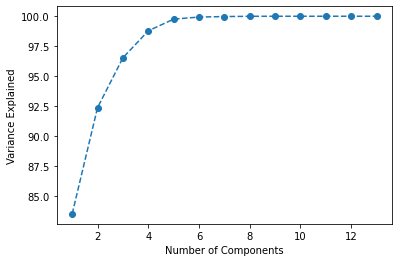

In [62]:
plt.plot(range(1,14),explained_variance,'o--')
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

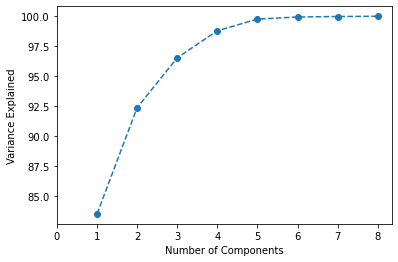

In [63]:
plt.plot(range(1,9),explained_variance[0:8],'o--')
plt.xticks(list(range(0,9,1)))
plt.xlabel("Number of Components")
plt.ylabel("Variance Explained");

In [64]:
explained_variance[3]

98.77978599934565

4 components can explain 98.77% variance so lets use only 4 components

In [65]:
pca = PCA(n_components=4)
x_pca_region=pca.fit_transform(XRegion)

In [66]:
max_accu=0
maxRS=0
for i in range(200):
    X_train, X_test, y_train, y_test = train_test_split(x_pca_region, yRegion, test_size=0.33, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    pred=dt.predict(X_test)
    accurac=accuracy_score(y_test,pred)
    #print(accurac*100,"at random state",i)
    if(accurac>max_accu):
        max_accu=accurac
        maxRS=i
        
print("best accuracy is",max_accu,"on random state",maxRS)

best accuracy is 0.631244635193133 on random state 94


best accuracy is 0.6298712446351932 on random state 94


In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
leRegion=LabelEncoder()

In [69]:
yRegionLE=leRegion.fit_transform(yRegion)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_region, yRegion, test_size=0.33, random_state=94)


### Scaling

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
x_train_scale=scaler.fit_transform(X_train)


In [74]:
x_test_scale=scaler.transform(X_test)
x_test_scale

array([[ 0.20710373, -0.58701998, -0.27954635,  0.10514155],
       [-0.85494212, -0.15179707,  0.03072131,  0.27952116],
       [-0.75106915, -0.10924443, -0.21428773, -0.4008403 ],
       ...,
       [-0.31811661,  0.09814635, -0.51198753,  0.59997254],
       [ 1.0474698 ,  0.65853264, -2.90488642, -1.22701549],
       [ 2.22217328, -0.0202891 ,  3.4339137 ,  0.73513844]])

In [75]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train_scale,y_train)
pred=DTC.predict(x_test_scale)
print(classification_report(y_test,pred))


                     precision    recall  f1-score   support

             Albany       0.69      0.76      0.72       114
            Atlanta       0.53      0.64      0.58       100
BaltimoreWashington       0.75      0.77      0.76       120
              Boise       0.56      0.76      0.65       108
             Boston       0.78      0.80      0.79       112
   BuffaloRochester       0.56      0.58      0.57       125
         California       0.72      0.72      0.72       107
          Charlotte       0.57      0.55      0.56       103
            Chicago       0.84      0.81      0.83       127
   CincinnatiDayton       0.64      0.68      0.66        92
           Columbus       0.46      0.44      0.45       111
      DallasFtWorth       0.67      0.67      0.67       102
             Denver       0.69      0.62      0.65       103
            Detroit       0.53      0.51      0.52       117
        GrandRapids       0.66      0.60      0.63       127
         GreatLakes    

Even without scaling it gave same accuracy So not doing scaling

In [77]:
RFC=RandomForestClassifier()
RFC.fit(X_train,y_train)
pred=RFC.predict(X_test)
print(classification_report(y_test,pred))

                     precision    recall  f1-score   support

             Albany       0.71      0.87      0.78       114
            Atlanta       0.70      0.80      0.75       100
BaltimoreWashington       0.84      0.78      0.81       120
              Boise       0.68      0.72      0.70       108
             Boston       0.81      0.86      0.83       112
   BuffaloRochester       0.68      0.62      0.65       125
         California       0.86      0.81      0.84       107
          Charlotte       0.68      0.75      0.71       103
            Chicago       0.85      0.91      0.88       127
   CincinnatiDayton       0.70      0.78      0.74        92
           Columbus       0.54      0.57      0.55       111
      DallasFtWorth       0.73      0.75      0.74       102
             Denver       0.78      0.63      0.70       103
            Detroit       0.68      0.71      0.69       117
        GrandRapids       0.79      0.72      0.76       127
         GreatLakes    

In [78]:
svc=SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
print(classification_report(y_test,pred))

                     precision    recall  f1-score   support

             Albany       0.12      0.45      0.19       114
            Atlanta       0.75      0.36      0.49       100
BaltimoreWashington       0.89      0.42      0.58       120
              Boise       0.23      0.41      0.30       108
             Boston       0.80      0.44      0.57       112
   BuffaloRochester       0.63      0.32      0.43       125
         California       0.84      0.57      0.68       107
          Charlotte       0.62      0.34      0.44       103
            Chicago       0.84      0.72      0.78       127
   CincinnatiDayton       0.39      0.40      0.40        92
           Columbus       0.35      0.30      0.32       111
      DallasFtWorth       0.70      0.45      0.55       102
             Denver       0.85      0.45      0.59       103
            Detroit       0.74      0.32      0.44       117
        GrandRapids       0.89      0.27      0.41       127
         GreatLakes    

In [79]:
ada=AdaBoostClassifier()
ada.fit(X_train,y_train)
pred=ada.predict(X_test)
print(classification_report(y_test,pred))

                     precision    recall  f1-score   support

             Albany       0.00      0.00      0.00       114
            Atlanta       0.00      0.00      0.00       100
BaltimoreWashington       0.00      0.00      0.00       120
              Boise       0.00      0.00      0.00       108
             Boston       0.00      0.00      0.00       112
   BuffaloRochester       0.00      0.00      0.00       125
         California       0.00      0.00      0.00       107
          Charlotte       0.03      0.43      0.05       103
            Chicago       0.00      0.00      0.00       127
   CincinnatiDayton       0.00      0.00      0.00        92
           Columbus       0.00      0.00      0.00       111
      DallasFtWorth       0.04      0.09      0.06       102
             Denver       0.19      0.38      0.25       103
            Detroit       0.00      0.00      0.00       117
        GrandRapids       0.00      0.00      0.00       127
         GreatLakes    

Random Forest Classifier is the best algorithm with 73% accuracy

### Hyper Parameter Tuning

In [80]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  P

In [85]:
XRegion

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,11.861915,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,0,2015,12,27
1,1.35,11.681565,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,0,2015,12,20
2,0.93,12.563792,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,0,2015,12,13
3,1.08,12.099252,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,0,2015,12,6
4,1.28,11.598663,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,10.355397,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,1,2018,2,4
8,1.71,10.122725,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,1,2018,1,28
9,1.87,10.112859,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,1,2018,1,21
10,1.93,10.296466,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,1,2018,1,14


In [83]:
yRegion

0               Albany
1               Albany
2               Albany
3               Albany
4               Albany
            ...       
7     WestTexNewMexico
8     WestTexNewMexico
9     WestTexNewMexico
10    WestTexNewMexico
11    WestTexNewMexico
Name: region, Length: 17651, dtype: object

In [88]:
from sklearn.pipeline import Pipeline

In [107]:
operations = [('pca',PCA()),('rfc',RandomForestClassifier())]
param_grid = {'pca__n_components':list(range(4,9)),
          'rfc__criterion':['gini','entropy'],
           'rfc__max_features':['sqrt','log2']
             }
pipe=Pipeline(operations)

In [108]:
gcv=GridSearchCV(pipe,param_grid,cv=5,verbose=2,scoring='accuracy')


In [109]:
gcv.fit(XRegion,yRegion)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END pca__n_components=4, rfc__criterion=gini, rfc__max_features=sqrt; total time=   4.4s
[CV] END pca__n_components=4, rfc__criterion=gini, rfc__max_features=sqrt; total time=   4.3s
[CV] END pca__n_components=4, rfc__criterion=gini, rfc__max_features=sqrt; total time=   4.6s
[CV] END pca__n_components=4, rfc__criterion=gini, rfc__max_features=sqrt; total time=   4.6s
[CV] END pca__n_components=4, rfc__criterion=gini, rfc__max_features=sqrt; total time=   4.5s
[CV] END pca__n_components=4, rfc__criterion=gini, rfc__max_features=log2; total time=   4.3s
[CV] END pca__n_components=4, rfc__criterion=gini, rfc__max_features=log2; total time=   4.3s
[CV] END pca__n_components=4, rfc__criterion=gini, rfc__max_features=log2; total time=   4.5s
[CV] END pca__n_components=4, rfc__criterion=gini, rfc__max_features=log2; total time=   4.7s
[CV] END pca__n_components=4, rfc__criterion=gini, rfc__max_features=log2; total time=   4.6

[CV] END pca__n_components=8, rfc__criterion=gini, rfc__max_features=log2; total time=   6.0s
[CV] END pca__n_components=8, rfc__criterion=gini, rfc__max_features=log2; total time=   6.4s
[CV] END pca__n_components=8, rfc__criterion=gini, rfc__max_features=log2; total time=   6.8s
[CV] END pca__n_components=8, rfc__criterion=gini, rfc__max_features=log2; total time=   6.4s
[CV] END pca__n_components=8, rfc__criterion=entropy, rfc__max_features=sqrt; total time=  35.9s
[CV] END pca__n_components=8, rfc__criterion=entropy, rfc__max_features=sqrt; total time=  39.3s
[CV] END pca__n_components=8, rfc__criterion=entropy, rfc__max_features=sqrt; total time=  40.4s
[CV] END pca__n_components=8, rfc__criterion=entropy, rfc__max_features=sqrt; total time=  39.9s
[CV] END pca__n_components=8, rfc__criterion=entropy, rfc__max_features=sqrt; total time=  39.1s
[CV] END pca__n_components=8, rfc__criterion=entropy, rfc__max_features=log2; total time=  54.3s
[CV] END pca__n_components=8, rfc__criteri

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('rfc', RandomForestClassifier())]),
             param_grid={'pca__n_components': [4, 5, 6, 7, 8],
                         'rfc__criterion': ['gini', 'entropy'],
                         'rfc__max_features': ['sqrt', 'log2']},
             scoring='accuracy', verbose=2)

In [110]:
gcv.best_params_

{'pca__n_components': 8, 'rfc__criterion': 'gini', 'rfc__max_features': 'log2'}

In [111]:
gcv.best_estimator_

Pipeline(steps=[('pca', PCA(n_components=8)),
                ('rfc', RandomForestClassifier(max_features='log2'))])

In [112]:
gcv.best_score_

0.5746971020736609

### training with best params

In [114]:
df1ForRegion

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,11.861915,32.198447,233.355630,6.939741,93.257010,92.755701,9.656604,0.0,conventional,2015,Albany,12,27
1,1.35,11.681565,25.966902,211.278986,7.637408,97.496461,96.995206,9.873702,0.0,conventional,2015,Albany,12,20
2,0.93,12.563792,28.190424,330.378071,11.423660,90.251593,89.678370,10.155787,0.0,conventional,2015,Albany,12,13
3,1.08,12.099252,33.645208,268.284196,8.519390,76.230965,75.348524,11.565466,0.0,conventional,2015,Albany,12,6
4,1.28,11.598663,30.683546,209.376193,8.705171,78.638095,77.370925,14.060228,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1.63,10.355397,45.243342,39.104987,0.000000,116.183777,114.310192,20.781001,0.0,organic,2018,WestTexNewMexico,2,4
8,1.71,10.122725,34.521008,58.579006,0.000000,96.254039,94.551785,18.022209,0.0,organic,2018,WestTexNewMexico,1,28
9,1.87,10.112859,34.524194,49.525650,26.980363,96.923217,96.704705,6.504614,0.0,organic,2018,WestTexNewMexico,1,21
10,1.93,10.296466,39.084908,54.598901,26.963123,104.735572,104.496603,7.071068,0.0,organic,2018,WestTexNewMexico,1,14


In [144]:

ct = ColumnTransformer([('oneHotEncode', OneHotEncoder(), ['type'])], remainder='passthrough')

In [146]:
pca=PCA(n_components=8)
rfc=RandomForestClassifier(criterion='gini',max_features='log2')


operations = [('ct',ct),('pca',pca),('rfc',rfc)]
#operations = [('pca',pca),('rfc',rfc)]


pipe=Pipeline(operations)

In [147]:
XRegion=df1ForRegion.drop('region',axis=1)

In [148]:
YRegion=df1ForRegion['region']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(XRegion, YRegion, test_size=0.33, random_state=i)

In [150]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oneHotEncode',
                                                  OneHotEncoder(),
                                                  ['type'])])),
                ('pca', PCA(n_components=8)),
                ('rfc', RandomForestClassifier(max_features='log2'))])

In [151]:
pred = pipe.predict(X_test)

In [154]:
confusion_matrix(y_test,pred)

array([[105,   0,   0, ...,   0,   0,   0],
       [  0,  84,   0, ...,   0,   0,   1],
       [  0,   0, 104, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  54,   0,   0],
       [  0,   0,   0, ...,   0,  79,   0],
       [  0,   1,   0, ...,   0,   0,  74]], dtype=int64)

In [155]:
print(classification_report(y_test,pred))

                     precision    recall  f1-score   support

             Albany       0.81      0.85      0.83       123
            Atlanta       0.73      0.77      0.75       109
BaltimoreWashington       0.88      0.94      0.91       111
              Boise       0.77      0.78      0.77       108
             Boston       0.86      0.83      0.84       110
   BuffaloRochester       0.72      0.72      0.72       106
         California       0.87      0.95      0.91        92
          Charlotte       0.87      0.81      0.84       114
            Chicago       0.91      0.93      0.92       120
   CincinnatiDayton       0.84      0.76      0.80       125
           Columbus       0.74      0.70      0.72       104
      DallasFtWorth       0.86      0.87      0.87       116
             Denver       0.81      0.78      0.79       112
            Detroit       0.79      0.79      0.79       112
        GrandRapids       0.81      0.78      0.80       115
         GreatLakes    

#### Final accuracy achieved is 81%

In [ ]:
## Saving the model

In [159]:
import joblib
joblib.dump(pipe,"Final_model_Avocado_Region.pkl")

['Final_model_Avocado_Region.pkl']